<a href="https://colab.research.google.com/github/yurimses/learning_cnn/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Networks:
Código adaptado da vídeo aula do Prof. Rafael Rossi (https://youtu.be/HV9cB6UKLIs?si=A4Q_bQMDjMgNS-5b)

# Bibliotecas

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

In [ ]:
tf.__version__

'2.15.0'

#Carregando a Base de Dados de Imagens

In [ ]:
# Dividindo em conjunto de treinamento e teste
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
# 32 pixels x 32 pixels x 3 canais (rgb)
X_train.shape

(50000, 32, 32, 3)

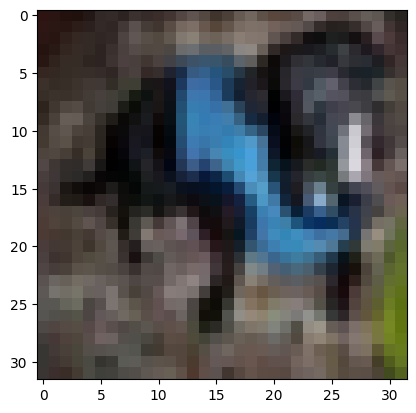

In [ ]:
# Verificar uma imagem qualquer do conjunto de treinamento
plt.imshow(X_train[27])

In [ ]:
# Verificar as classes, elas estão sendo representadas por números inteiros
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# Correspondência das classes
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Padronizando os Valores das Imagens [0-1] por Questões de Convergência

In [ ]:
# 255 é valor máximo que tem, mas pode usar X_train.max()
# X_train = X_train.max()
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# Criando a Rede Neural

## Criando o Modelo Sequencial

In [ ]:
model = tf.keras.Sequential()

## Criando Camadas de Convolução e Pooling

In [ ]:
# Conv2D remete ao uso de 2 dimensões (matriz); texto (Conv1D) ....
# Se eu colocar no kernel_size (tamanho do filtro) somente 5, ele já vai assumir que será uma matriz 5x5 (poderia usar uma tupla (5,5))
# Cada filtro é uma matriz de pesos que será aplicada à imagem de entrada para detectar diferentes caracterísitcas, como bordas, texturas e outros padrões
# Se filters = 32, a camada convolucional usará 32 filtros diferentes, resultando em 32 mapas de características.
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, activation = 'relu', input_shape = [32,32,3]))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, activation = 'relu'))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'valid'))

## Adicionando camada de Flattening

In [ ]:
model.add(tf.keras.layers.Flatten())

## Adicionando Camadas Densas

In [ ]:
# "Fully Connected"
# units (número de neurônios)
model.add(tf.keras.layers.Dense(units = 1024, activation = 'relu'))

## Camada de Saída

In [ ]:
# Camade de Saída
# 10 classes (10 neurônios)
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

# Sumário do Modelo

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)             

# Compilando o modelo

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Treinando o Modelo

In [ ]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4433 - accuracy: 0.4769
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0979 - accuracy: 0.6102
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9318 - accuracy: 0.6727
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7934 - accuracy: 0.7217
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6590 - accuracy: 0.7685


In [ ]:
image = X_test[27]

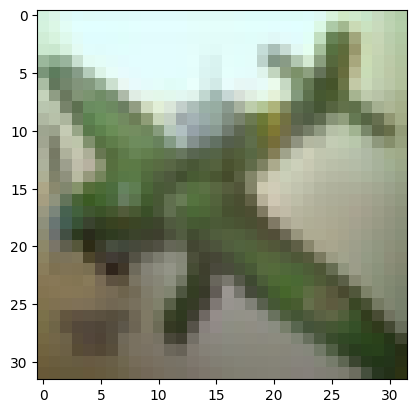

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(32, 32, 3)

In [ ]:
# Adicionando a dimensão de lote
image = np.expand_dims(image, axis=0)

In [ ]:
predictions = model.predict(image)

1/1 [==============================] - 0s 70ms/step


In [ ]:
# Convertendo probabilidades em classe
expected_class = np.argmax(predictions, axis=1)
print(expected_class)

[0]
